In [4]:
!gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 20.5MB/s]


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

In [8]:
data_path = "/content/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"]
X, labels = torch.tensor(X, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)


In [9]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y
  def __len__(self):
    return len(self.y)
  def __getitem__(self, index):
    return self.X[index], self.y[index]

In [10]:
train_dataset = CustomDataset(X, labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [23]:
class SoftMaxRegression(nn.Module):
  def __init__(self, input_dims, num_classes):
    super(SoftMaxRegression, self).__init__()
    self.fc = nn.Linear(input_dims, num_classes)
  def forward(self, x):
    x = self.fc(x)
    s = nn.Softmax(dim=1)
    x = s(x)
    return x
model = SoftMaxRegression(input_dims=2, num_classes=3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [26]:
num_epochs = 500
train_losses = []
train_acc = []

for epoch in range(num_epochs):
  model.train()
  train_loss = 0.0
  accuracy = 0
  count = 0
  for X,y in train_loader:
    X, y = X.to(device), y.to(device)
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    accuracy += (torch.argmax(outputs, 1) == y).sum().item()
    count += len(y)
  train_loss /= len(train_loader)
  train_losses.append(train_loss)
  accuracy /= count
  train_acc.append(accuracy)

  print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {train_loss:.4f},  Train_Acc: {accuracy:.4f}")

Epoch 1/500, Train_Loss: 0.9217,  Train_Acc: 0.5233
Epoch 2/500, Train_Loss: 0.9171,  Train_Acc: 0.5267
Epoch 3/500, Train_Loss: 0.9201,  Train_Acc: 0.5267
Epoch 4/500, Train_Loss: 0.9238,  Train_Acc: 0.5233
Epoch 5/500, Train_Loss: 0.9234,  Train_Acc: 0.5300
Epoch 6/500, Train_Loss: 0.9237,  Train_Acc: 0.5300
Epoch 7/500, Train_Loss: 0.9173,  Train_Acc: 0.5300
Epoch 8/500, Train_Loss: 0.9142,  Train_Acc: 0.5267
Epoch 9/500, Train_Loss: 0.9064,  Train_Acc: 0.5300
Epoch 10/500, Train_Loss: 0.9101,  Train_Acc: 0.5300
Epoch 11/500, Train_Loss: 0.9131,  Train_Acc: 0.5300
Epoch 12/500, Train_Loss: 0.9232,  Train_Acc: 0.5300
Epoch 13/500, Train_Loss: 0.9165,  Train_Acc: 0.5267
Epoch 14/500, Train_Loss: 0.9180,  Train_Acc: 0.5300
Epoch 15/500, Train_Loss: 0.9150,  Train_Acc: 0.5333
Epoch 16/500, Train_Loss: 0.9215,  Train_Acc: 0.5300
Epoch 17/500, Train_Loss: 0.9118,  Train_Acc: 0.5300
Epoch 18/500, Train_Loss: 0.9153,  Train_Acc: 0.5300
Epoch 19/500, Train_Loss: 0.9170,  Train_Acc: 0.5267
Ep

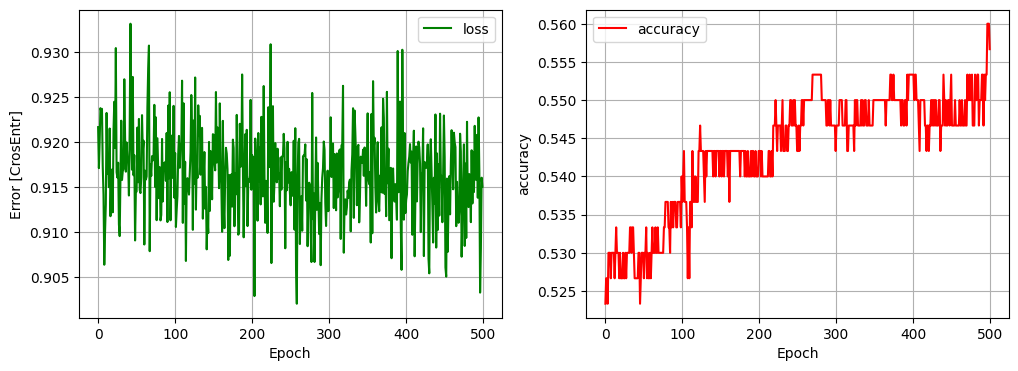

In [27]:

fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)



In [29]:
class MLP(nn.Module):
  def __init__(self, input_dims, hidden_dims, output_dims):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_dims, hidden_dims)
    self.fc2 = nn.Linear(hidden_dims, output_dims)
    self.relu = nn.ReLU()
  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

model = MLP(input_dims=2, hidden_dims=128, output_dims=3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [30]:
num_epochs = 500
train_losses = []
train_acc = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    accuracy = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        accuracy += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    accuracy /= cnt
    train_acc.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {train_loss:.4f},  Train_Acc: {accuracy:.4f}")

Epoch 1/500, Train_Loss: 0.9814,  Train_Acc: 0.5533
Epoch 2/500, Train_Loss: 0.8603,  Train_Acc: 0.5567
Epoch 3/500, Train_Loss: 0.8176,  Train_Acc: 0.5600
Epoch 4/500, Train_Loss: 0.7916,  Train_Acc: 0.5333
Epoch 5/500, Train_Loss: 0.7602,  Train_Acc: 0.5633
Epoch 6/500, Train_Loss: 0.7577,  Train_Acc: 0.5533
Epoch 7/500, Train_Loss: 0.7548,  Train_Acc: 0.5533
Epoch 8/500, Train_Loss: 0.7214,  Train_Acc: 0.5700
Epoch 9/500, Train_Loss: 0.7215,  Train_Acc: 0.5600
Epoch 10/500, Train_Loss: 0.7286,  Train_Acc: 0.5567
Epoch 11/500, Train_Loss: 0.7316,  Train_Acc: 0.5433
Epoch 12/500, Train_Loss: 0.7240,  Train_Acc: 0.5633
Epoch 13/500, Train_Loss: 0.7085,  Train_Acc: 0.5567
Epoch 14/500, Train_Loss: 0.7060,  Train_Acc: 0.5567
Epoch 15/500, Train_Loss: 0.7192,  Train_Acc: 0.5533
Epoch 16/500, Train_Loss: 0.7039,  Train_Acc: 0.5700
Epoch 17/500, Train_Loss: 0.6932,  Train_Acc: 0.5733
Epoch 18/500, Train_Loss: 0.7186,  Train_Acc: 0.5800
Epoch 19/500, Train_Loss: 0.7098,  Train_Acc: 0.5700
Ep

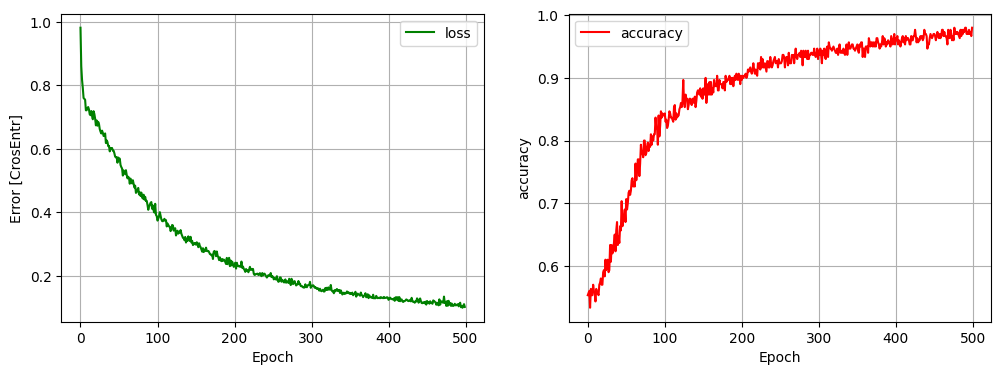

In [31]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)